<center><h1>Kaggle Competition</h1>
<h2>Titanic Survivors</h2></center>

<b>Columns</b><br>
PassengerId:  type should be integers<br>
Survived: Survived or Not<br>
Pclass: Class of Travel<br>
Name: Name of Passenger<br>
Sex: Gender<br>
Age: Age of Passengers<br>
SibSp: Number of Sibling/Spouse aboard<br>
Parch: Number of Parent/Child aboard<br>
Ticket<br>
Fare<br>
Cabin<br>
Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
missingAge = data['Age'].isnull()

In [6]:
data[missingAge]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [7]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data['Age'].fillna(value=data['Age'].mean(), inplace=True)

In [10]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


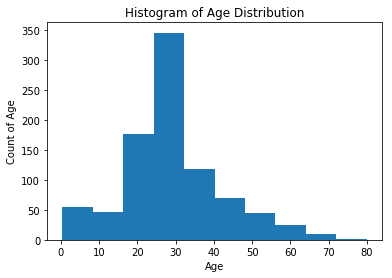

In [12]:
plt.hist(data.Age)
plt.xlabel('Age')
plt.ylabel('Count of Age')
plt.title('Histogram of Age Distribution')
plt.savefig('AgeHistogram.png')
plt.show()

In [13]:
import seaborn as sns

C:\Users\scott\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


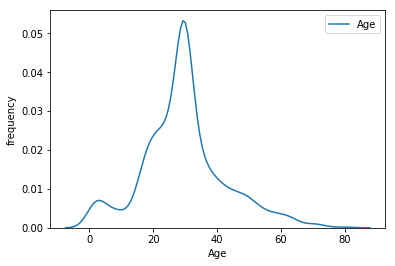

In [14]:
sns.kdeplot(data.Age)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.savefig('kdeplot.png')
plt.show()

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data['title'] = data.Name.str.extract(r'(Mr|Miss|Master|Madam|Mrs|Mlle|Dr|Ms|Rev|Col|Mme|Major|Capt|Countess)')

In [17]:
data['title'][:10]

0        Mr
1        Mr
2      Miss
3        Mr
4        Mr
5        Mr
6        Mr
7    Master
8        Mr
9        Mr
Name: title, dtype: object

In [18]:
data[data['title'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN


In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
data[data['title'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN


In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [22]:
data.title.value_counts()

Mr          635
Miss        180
Master       40
Dr           10
Col          10
Rev           6
Mlle          2
Major         2
Countess      1
Ms            1
Mme           1
Capt          1
Name: title, dtype: int64

In [23]:
data[['title', 'Survived']].groupby('title').sum()

,Survived
title,
Capt,0
Col,3
Countess,1
Dr,5
Major,1
Master,23
Miss,125
Mlle,2
Mme,1


In [24]:
data[data['title'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN


In [25]:
data['title'].fillna('Mr', inplace=True)

In [26]:
data[data['title'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [27]:
data[['title', 'Survived']].groupby('title').sum()

,Survived
title,
Capt,0
Col,3
Countess,1
Dr,5
Major,1
Master,23
Miss,125
Mlle,2
Mme,1


In [28]:
data[data['title'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
data[['Survived', 'Age', 'Fare']].corr()

,Survived,Age,Fare
Survived,1.000000,-0.069809,0.257307
Age,-0.069809,1.000000,0.091566
Fare,0.257307,0.091566,1.000000


In [32]:
data['Sex'][data.Sex=='male'].value_counts()

male    577
Name: Sex, dtype: int64

In [33]:
data[['Survived', 'Sex']].groupby('Sex').sum()

,Survived
Sex,
female,233
male,109


{'whiskers': [<matplotlib.lines.Line2D at 0x19045bc0cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x19045bf4780>,
 'boxes': [<matplotlib.lines.Line2D at 0x19045beb9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19045bf4fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19045bfc438>],
 'means': []}

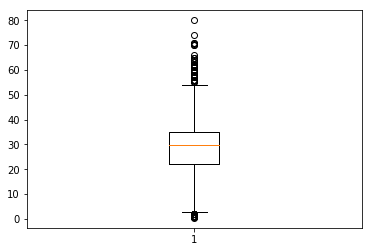

In [34]:
plt.boxplot(data['Age'])

In [35]:
data[['Age', 'Survived']]

,Age,Survived
0,22.000000,0
1,38.000000,1
2,26.000000,1
3,35.000000,1
4,35.000000,0
5,29.699118,0
6,54.000000,0
7,2.000000,0
8,27.000000,1
9,14.000000,1


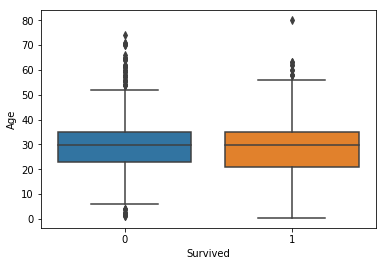

In [36]:
sns.boxplot(data.Survived, data.Age)

In [37]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [39]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
data.Embarked.isna().any()

True

In [41]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
data.Embarked.fillna(value='S', inplace=True)

In [43]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
data.Embarked.isna().any()

False

In [45]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
title           object
dtype: object

In [46]:
data['male'] = pd.get_dummies(data.Sex, drop_first=True)

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [48]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,title,male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mr,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mr,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,1,0,1


In [50]:
data.drop(columns='Sex', inplace=True)

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,title,male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mr,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mr,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr,1,0,1


In [52]:
data.title.value_counts()

Mr          637
Miss        180
Master       40
Dr           10
Col          10
Rev           6
Mlle          2
Major         2
Countess      1
Ms            1
Mme           1
Capt          1
Name: title, dtype: int64

In [53]:
data = pd.get_dummies(data, columns=['title'], drop_first=True)

In [54]:
data.shape

(891, 24)

In [55]:
data.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
male                uint8
Embarked_Q          uint8
Embarked_S          uint8
title_Col           uint8
title_Countess      uint8
title_Dr            uint8
title_Major         uint8
title_Master        uint8
title_Miss          uint8
title_Mlle          uint8
title_Mme           uint8
title_Mr            uint8
title_Ms            uint8
title_Rev           uint8
dtype: object

In [56]:
# assign features
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'male', 'Embarked_Q', 'Embarked_S',
       'title_Col', 'title_Countess', 'title_Dr', 'title_Major',
       'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr',
       'title_Ms', 'title_Rev'],
      dtype='object')

In [57]:
# # 'title_Col', 'title_Countess', 'title_Dr', 'title_Major',
#        'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr',
#        'title_Ms', 'title_Rev', 'Embarked_Q', 'Embarked_S'
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [58]:
target = data.Survived

In [59]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [60]:
X = data[features]

In [61]:
y = target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [63]:
print(X_train.shape)
print(X_test.shape)

(668, 6)
(223, 6)


In [64]:
dtc = DecisionTreeClassifier()

In [65]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
prediction = dtc.predict(X_test)

In [67]:
prediction.shape

(223,)

In [68]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.7892376681614349

In [69]:
rmse = sqrt(mean_squared_error(y_true=y_test, y_pred=prediction))

In [70]:
print(rmse)

0.459088588225154


# Predict Test Sample

In [71]:
testdata = pd.read_csv('test.csv')

In [72]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
testdata.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [74]:
data['Age'].mean()

29.699117647058763

In [75]:
testdata.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [76]:
testdata.Age.mean()

30.272590361445783

In [77]:
testdata.Age.median()

27.0

In [78]:
# fill missing age values with the mean
testdata['Age'].fillna(value=testdata['Age'].mean(), inplace=True)

In [79]:
testdata.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [80]:
# get titles from Name
testdata['title'] = testdata.Name.str.extract(r'(Mr|Miss|Master|Madam|Mrs|Mlle|Dr|Ms|Rev|Col|Mme|Major|Capt|Countess)')

In [81]:
testdata['title'].value_counts()

Mr        309
Miss       77
Master     20
Dr          4
Col         4
Rev         2
Ms          1
Name: title, dtype: int64

In [82]:
testdata['title'].fillna(value='Miss', inplace=True)

In [83]:
testdata.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
title           object
dtype: object

In [84]:
testdata[testdata['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [85]:
testdata['Fare'].fillna(value=testdata['Fare'].mean(), inplace=True)

In [86]:
testdata[testdata['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [87]:
testdata = pd.get_dummies(testdata, columns=['Sex'], drop_first=True)

In [88]:
testdata.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,Mr,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,Mr,0


In [89]:
testdata = pd.get_dummies(testdata, columns=['title'], drop_first=True)

In [90]:
testdata.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,title_Dr,title_Master,title_Miss,title_Mr,title_Ms,title_Rev
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,0,1,0,0


In [91]:
testdata.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_male', 'title_Dr', 'title_Master',
       'title_Miss', 'title_Mr', 'title_Ms', 'title_Rev'],
      dtype='object')

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,title_Countess,title_Dr,title_Major,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Ms,title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,1,0,0


In [93]:
testdata.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_male', 'title_Dr', 'title_Master',
       'title_Miss', 'title_Mr', 'title_Ms', 'title_Rev'],
      dtype='object')

In [94]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [95]:
#'title_Mme',  'title_Mlle','title_Major','title_Countess',
testdata['title_Mme'] = 0

In [96]:
testdata['title_Mlle'] = 0

In [97]:
testdata['title_Major'] = 0

In [98]:
testdata['title_Countess'] = 0

In [99]:
testdata['title_Col'] = 0

In [100]:
testdata.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,title_Master,title_Miss,title_Mr,title_Ms,title_Rev,title_Mme,title_Mlle,title_Major,title_Countess,title_Col
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,...,0,0,1,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,...,0,0,1,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,...,0,0,1,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,...,0,0,1,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,...,0,0,1,0,0,0,0,0,0,0


In [101]:
testdata = pd.get_dummies(testdata, columns=['Embarked'], drop_first=True)

In [102]:
testdata.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,...,title_Mr,title_Ms,title_Rev,title_Mme,title_Mlle,title_Major,title_Countess,title_Col,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,...,1,0,0,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,...,1,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,...,1,0,0,0,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,...,1,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,...,1,0,0,0,0,0,0,0,0,1


In [103]:
testdata.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_male', 'title_Dr', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Ms', 'title_Rev', 'title_Mme', 'title_Mlle',
       'title_Major', 'title_Countess', 'title_Col', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [104]:
# , 'title_Dr', 'title_Master', 'title_Miss',
#        'title_Mr', 'title_Ms', 'title_Rev', 'title_Mme', 'title_Mlle', 'title_Col','title_Major', 'title_Countess', 'Embarked_Q', 'Embarked_S'

In [105]:
testFeatures = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']

In [106]:
X = testdata[testFeatures]

In [107]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [108]:
X.shape

(418, 6)

In [109]:
X_train.shape

(668, 6)

In [110]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male
105,3,28.0,0,0,7.8958,1
68,3,17.0,4,2,7.9250,0
253,3,30.0,1,0,16.1000,1
320,3,22.0,0,0,7.2500,1
706,2,45.0,0,0,13.5000,0


In [111]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [112]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'], dtype='object')

In [113]:
TestPrediction = dtc.predict(X)

In [114]:
TestPrediction = pd.Series(TestPrediction)

In [115]:
TestPrediction.to_csv('TitanicPrediciton.csv')

In [116]:
X['Survived'] = pd.DataFrame(TestPrediction)

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
X.shape

(418, 7)

In [118]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Survived
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,1,0
3,3,27.0,0,0,8.6625,1,1
4,3,22.0,1,1,12.2875,0,1


In [119]:
testdata['Survived'] = TestPrediction

In [120]:
testdata.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,...,title_Ms,title_Rev,title_Mme,title_Mlle,title_Major,title_Countess,title_Col,Embarked_Q,Embarked_S,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,...,0,0,0,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,...,0,0,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,...,0,0,0,0,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,...,0,0,0,0,0,0,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,...,0,0,0,0,0,0,0,0,1,1


In [121]:
TitanicPrediction = testdata[['PassengerId', 'Survived']]

In [122]:
TitanicPrediction.to_csv('TitanicPrediciton2.csv')